


# EJERCICIO 06
	
### Santiago Barco - 200913781		
### Rafael Niño - 200522388	




<img src="https://blog.keras.io/img/keras-tensorflow-logo.jpg">

Disponible en: https://blog.keras.io/img/keras-tensorflow-logo.jpg

# Exercise 06
# TensorFlow and Keras


---

In [61]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons

%matplotlib inline

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

### 1. Multilayer neural network in TensorFlow

You need to create a neural network model in TF that is able to discriminate the two classes in the following dataset:

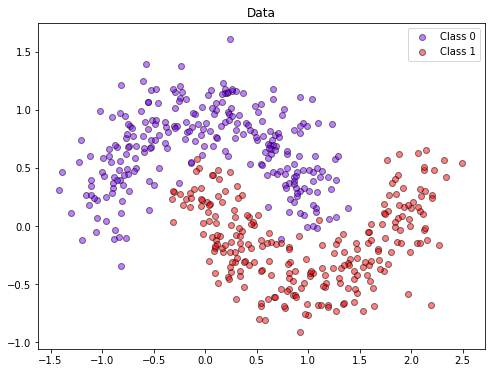

In [62]:
X, Y = make_moons(n_samples=1000, noise= 0.2, random_state=3)
x_train = X[:500]
x_test  = X[500:]
y_train = Y[:500]
y_test  = Y[500:]

pl.figure(figsize=(8, 6))
plot_data(x_train, y_train)

For this you will need to create a neural network with one hidden layer. You cannot use prebuilt models 
such as those in `tf.estimator`. **Hint**: extend the logistic regression example from the TensorFlow handout. 

Your answer must contain the following:
* A visualization of the CG of the model.
* A visualization of the decision region along with the test data.
* A snapshot from TensorBoard that shows the evolution of the training and test loss.

### INICIO DEL MODELO

In [78]:
numN = 10
graph = tf.Graph()
with graph.as_default():
    
## Informción de entrada

    x = tf.placeholder(tf.float32,shape=[None,2]) 
    y_true = tf.placeholder(tf.float32,shape=None) 
    
    with tf.name_scope('hidden_layer') as scope: 
        w_1 = tf.Variable(tf.random_normal([numN,2]),dtype=tf.float32,name='weights_1')
        b1 = tf.Variable(tf.random_normal([numN,1]),dtype=tf.float32,name='bias1') 
   
        #h = tf.matmul(w_1,tf.transpose(x)) + b1
        h = tf.sigmoid(tf.matmul(w_1,tf.transpose(x)) + b1, name='sigmoid') #brosfcasting
   
    
## Modificación del modelo con INFERENCE
    with tf.name_scope('inference') as scope:
        w_2 = tf.Variable(tf.random_normal([1,numN]),dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias') 
        y_pred = tf.sigmoid(tf.matmul(w_2,h) + b )

## Uso del Sigmoide para clasificación.
    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred)
        loss = tf.reduce_mean(loss) 
  
    ## Realización del entrenamiento 
    with tf.name_scope('train') as scope:
        learning_rate = 1.0
        optimizer = tf.train.GradientDescentOptimizer(learning_rate) 
        train = optimizer.minimize(loss)

    init = tf.global_variables_initializer()
    
show_graph(graph.as_graph_def())

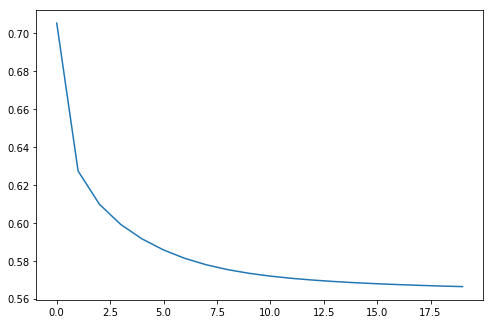

In [79]:
num_epochs = 1000
losses = []

with graph.as_default(): 
    sess = tf.Session()
    sess.run(init)      
    for step in range(num_epochs):
        sess.run(train,{x: x_train, y_true: y_train}) 
        if (step % 50 == 0):
            losses.append(sess.run(loss, {x: x_train, y_true: y_train})) 
                       
pl.figure(figsize = (8,16/3)) 
pl.plot(losses)

[[-0.30157146  3.14420986]
 [-1.58191955 -0.37843749]
 [ 0.75273973  0.15912756]
 [ 0.15029851  0.10955933]
 [-0.60621899  2.96835589]
 [ 0.75748503 -2.24115562]
 [-0.41210374  3.03537726]
 [ 0.98253912 -1.5796808 ]
 [-1.98490095  2.96617675]
 [ 1.22123992  0.43907058]]
[[ 0.00024067]]


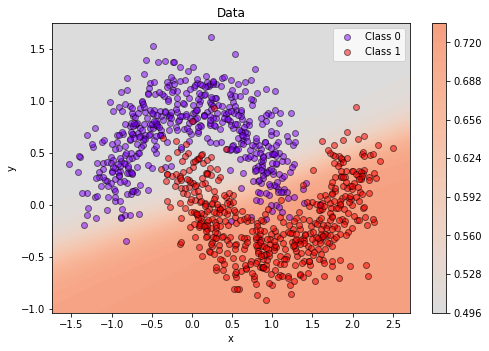

In [80]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

with graph.as_default():
    wval = sess.run(w_1)
    print(wval)
    result = sess.run(y_pred, {x:np.array([[1,2]])}) 
    print(result)
    def pred_fun(x1, x2):
        xval = np.array([[x1, x2]])
        return sigmoid(sess.run(y_pred,{x: xval}))

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, pred_fun)
plot_data(X, Y)

### 2. Improving the Keras text classifier

Your goal is to improve the performance of the text classifier in the Keras handout. This is are the things that you need to try:

* Different activation functions for the hidden layer (https://keras.io/activations/)
* Different optimizers (https://keras.io/optimizers/)
* Add dropout between the hidden layer and the output layer (https://keras.io/layers/core/#dropout)
* Different initializers for the dense layers (https://keras.io/initializers/)

Try different combinations and report your findings at the end. Which configuration got the best accuracy in test?


## INICIO

We will create a model to classifiy Reuters newswires
according to their topic. The original dataset is available [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection), but Keras has functions that facilitate the task of loading and preprocessing it.

In [4]:
from keras.datasets import reuters
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer

max_words = 1000
## las 1000 palabras mas comunes dentro del data set.
##stock words: Palabras que son conectivos, o que no tienen infdrmación
# los stock words son las palabras maas frecuentes.

## Hoy en día no se usa filtrar las stock words

Using TensorFlow backend.


In [5]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

Loading data...
8982 train sequences
2246 test sequences
46 classes


In [6]:
num_classes

46

In [7]:
print(x_train[101])

[1, 2, 149, 8, 25, 2, 400, 304, 200, 6, 337, 4, 342, 2, 2, 7, 2, 2, 9, 4, 342, 643, 2, 7, 2, 4, 88, 2, 31, 4, 384, 292, 211, 5, 2, 978, 220, 33, 851, 2, 11, 15, 9, 447, 7, 42, 92, 131, 276, 5, 156, 11, 15, 50, 33, 30, 2, 7, 2, 383, 29, 336, 25, 383, 29, 2, 94, 156, 4, 49, 8, 7, 788, 4, 88, 33, 2, 747, 11, 15, 197, 92, 222, 825, 5, 934, 11, 15, 2, 8, 17, 12]


In [8]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
num_words = max(word_index.values()) + 1
words = ['']*num_words
for word in word_index:
    words[word_index[word]] = word
print([words[i-2] for i in x_train[101][1:]])

['', 'dlr', 'and', 'cts', '', '80', 'average', 'companies', 'in', 'income', 'of', 'make', '', '', 'said', '', '', 'a', 'of', 'make', '52', '', 'said', '', 'of', '1987', '', '2', 'of', 'sold', 'general', 'states', 'to', '', 'field', 'securities', 'was', 'agricultural', '', '3', 'it', 'a', '1988', 'said', 'as', 'april', '50', 'term', 'to', 'earlier', '3', 'it', 'but', 'was', 'with', '', 'said', '', 'previously', 'be', 'sell', 'cts', 'previously', 'be', '', 'more', 'earlier', 'of', 'which', 'and', 'said', 'commerce', 'of', '1987', 'was', '', 'august', '3', 'it', 'export', 'april', 'report', 'vice', 'to', 'beef', '3', 'it', '', 'and', '000', 'for']


In [9]:
num_words

30980

In [10]:
max_words

1000

In [11]:
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


In [12]:
print(x_train[1001])

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [13]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons
import keras

%matplotlib inline

In [14]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
## se tienen 46 clases o 46 neuronas de salida.
# la salida es todas las neuronas en cero, exp 1.

y_train shape: (8982, 46)
y_test shape: (2246, 46)


## Construcción de la red neuronal con una capa oculta

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

In [16]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_1 (Dense)                (None, 256)                 256256     
______________________________________________________________________
activation_1 (Activation)      (None, 256)                 0          
______________________________________________________________________
dense_2 (Dense)                (None, 46)                  11822      
______________________________________________________________________
activation_2 (Activation)      (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


## Optmizador SGD 

In [17]:
from keras.optimizers import SGD

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])


## Usando entrenamiento mediante la validacion de split 0.1 

In [19]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 3s 346us/step - loss: 2.4542 - acc: 0.3630 - val_loss: 2.3069 - val_acc: 0.4260
Epoch 2/5
8083/8083 [==============================] - 2s 295us/step - loss: 2.1809 - acc: 0.4397 - val_loss: 2.1788 - val_acc: 0.4750
Epoch 3/5
8083/8083 [==============================] - 2s 292us/step - loss: 2.0693 - acc: 0.4876 - val_loss: 2.0863 - val_acc: 0.4905
Epoch 4/5
8083/8083 [==============================] - 2s 286us/step - loss: 1.9903 - acc: 0.5032 - val_loss: 2.0180 - val_acc: 0.5061
Epoch 5/5
8083/8083 [==============================] - 2s 294us/step - loss: 1.9276 - acc: 0.5163 - val_loss: 1.9608 - val_acc: 0.5150


In [20]:
history

## Performance del MODELO 1

In [21]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 109us/step
Test score: 1.92646665713
Test accuracy: 0.52582368658


In [22]:
Score_modelo1 = score[0]
Score_modelo1
AUC_modelo1 = score[1]
AUC_modelo1
print('Score_modelo1:  ', score[0])
print('AUC_modelo1:   ', score[1])


Score_modelo1:   1.92646665713
AUC_modelo1:    0.52582368658


In [23]:
score

[1.9264666571324145, 0.52582368658041168]

## MODELO 2

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

### Different activation functions for the hidden layer (https://keras.io/activations/)
### Cambio  de relu y softsign por tanh y hard_sigmoid

In [25]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('tanh'))
model.add(Dense(num_classes))
model.add(Activation('hard_sigmoid'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_3 (Dense)                (None, 256)                 256256     
______________________________________________________________________
activation_3 (Activation)      (None, 256)                 0          
______________________________________________________________________
dense_4 (Dense)                (None, 46)                  11822      
______________________________________________________________________
activation_4 (Activation)      (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [26]:
### OPTIMIZADOR

from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [27]:

batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 3s 327us/step - loss: 3.4535 - acc: 0.3739 - val_loss: 3.2922 - val_acc: 0.3626
Epoch 2/5
8083/8083 [==============================] - 2s 269us/step - loss: 3.1537 - acc: 0.3728 - val_loss: 3.0664 - val_acc: 0.3359
Epoch 3/5
8083/8083 [==============================] - 2s 276us/step - loss: 2.9751 - acc: 0.3610 - val_loss: 3.0562 - val_acc: 0.3204
Epoch 4/5
8083/8083 [==============================] - 2s 272us/step - loss: 2.8615 - acc: 0.2989 - val_loss: 2.8538 - val_acc: 0.0033
Epoch 5/5
8083/8083 [==============================] - 2s 268us/step - loss: 2.6129 - acc: 0.0064 - val_loss: 2.7776 - val_acc: 0.0033


In [28]:
## PERFORMANCE DE MODELO
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 104us/step
Test score: 2.66612626056
Test accuracy: 0.0053428317008


In [29]:
Score_modelo2 = score[0]
Score_modelo2
AUC_modelo2 = score[1]
AUC_modelo2
print('Score_modelo2:  ', score[0])
print('AUC_modelo2:   ', score[1])

Score_modelo2:   2.66612626056
AUC_modelo2:    0.0053428317008


## MODELO 3
## Different optimizers (https://keras.io/optimizers/)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

In [31]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_5 (Dense)                (None, 256)                 256256     
______________________________________________________________________
activation_5 (Activation)      (None, 256)                 0          
______________________________________________________________________
dense_6 (Dense)                (None, 46)                  11822      
______________________________________________________________________
activation_6 (Activation)      (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


## Se usa el optimizador ADAGRAD con las condiciones del Modelo 1
Adagrad optimizer.

Adagrad is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. The more updates a parameter receives, the smaller the updates.

It is recommended to leave the parameters of this optimizer at their default values.

In [32]:
### OPTIMIZADOR

from keras.optimizers import Adagrad

model.compile(loss='categorical_crossentropy',
              optimizer=Adagrad(),
              metrics=['accuracy'])

In [33]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 4s 483us/step - loss: 1.3940 - acc: 0.6851 - val_loss: 1.2423 - val_acc: 0.7330
Epoch 2/5
8083/8083 [==============================] - 3s 425us/step - loss: 1.0066 - acc: 0.7807 - val_loss: 1.1266 - val_acc: 0.7597
Epoch 3/5
8083/8083 [==============================] - 3s 424us/step - loss: 0.8819 - acc: 0.8030 - val_loss: 1.0695 - val_acc: 0.7597
Epoch 4/5
8083/8083 [==============================] - 3s 430us/step - loss: 0.8014 - acc: 0.8169 - val_loss: 1.0213 - val_acc: 0.7720
Epoch 5/5
8083/8083 [==============================] - 3s 426us/step - loss: 0.7420 - acc: 0.8305 - val_loss: 0.9939 - val_acc: 0.7764


In [34]:
## PERFORMANCE DE MODELO
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 110us/step
Test score: 0.958287982567
Test accuracy: 0.776491540516


In [35]:
Score_modelo3 = score[0]
Score_modelo3
AUC_modelo3 = score[1]
AUC_modelo3
print('Score_modelo3:  ', score[0])
print('AUC_modelo3:   ', score[1])

Score_modelo3:   0.958287982567
AUC_modelo3:    0.776491540516


## Modelo 4

Add dropout between the hidden layer and the output layer (https://keras.io/layers/core/#dropout)

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

### Applies Dropout to the input.

### Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Se usa un dropout del 20%, segpun https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

Generally, use a small dropout value of 20%-50% of neurons with 20% providing a good starting point. A probability too low has minimal effect and a value too high results in under-learning by the network.
Use a larger network. You are likely to get better performance when dropout is used on a larger network, giving the model more of an opportunity to learn independent representations.
Use dropout on incoming (visible) as well as hidden units. Application of dropout at each layer of the network has shown good results.
Use a large learning rate with decay and a large momentum. Increase your learning rate by a factor of 10 to 100 and use a high momentum value of 0.9 or 0.99.
Constrain the size of network weights. A large learning rate can result in very large network weights. Imposing a constraint on the size of network weights such as max-norm regularization with a size of 4 or 5 has been shown to improve results.

Source: https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/



## Se usa un Dropout del 20%


In [37]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('sigmoid'))
# se ingresa el dropout
#keras.layers.Dropout(rate, noise_shape=None, seed=None)
model.add(Dropout(0.2))


model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_7 (Dense)                (None, 256)                 256256     
______________________________________________________________________
activation_7 (Activation)      (None, 256)                 0          
______________________________________________________________________
dropout_1 (Dropout)            (None, 256)                 0          
______________________________________________________________________
dense_8 (Dense)                (None, 46)                  11822      
______________________________________________________________________
activation_8 (Activation)      (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [38]:
### OPTIMIZADOR

from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [39]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 3s 387us/step - loss: 2.4782 - acc: 0.3591 - val_loss: 2.3125 - val_acc: 0.3582
Epoch 2/5
8083/8083 [==============================] - 3s 323us/step - loss: 2.2335 - acc: 0.4237 - val_loss: 2.1937 - val_acc: 0.3804
Epoch 3/5
8083/8083 [==============================] - 3s 320us/step - loss: 2.1225 - acc: 0.4561 - val_loss: 2.0909 - val_acc: 0.4883
Epoch 4/5
8083/8083 [==============================] - 3s 315us/step - loss: 2.0361 - acc: 0.4867 - val_loss: 2.0203 - val_acc: 0.5061
Epoch 5/5
8083/8083 [==============================] - 3s 312us/step - loss: 1.9860 - acc: 0.4992 - val_loss: 1.9664 - val_acc: 0.5150


In [40]:
## PERFORMANCE DE MODELO
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 111us/step
Test score: 1.93178610131
Test accuracy: 0.531166518281


In [41]:
Score_modelo4 = score[0]
Score_modelo4
AUC_modelo4 = score[1]
AUC_modelo4
print('Score_modelo4:  ', score[0])
print('AUC_modelo4:   ', score[1])

Score_modelo4:   1.93178610131
AUC_modelo4:    0.531166518281


## Modelo 5

## Different initializers for the dense layers (https://keras.io/initializers/)

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

### Se usa kernel_initializer='random_uniform',bias_initializer='zeros'

### Para generar una distribución uniforme

In [43]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)  ,kernel_initializer='random_uniform',bias_initializer='zeros'))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_9 (Dense)                (None, 256)                 256256     
______________________________________________________________________
activation_9 (Activation)      (None, 256)                 0          
______________________________________________________________________
dense_10 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_10 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [44]:
### OPTIMIZADOR

from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [45]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 3s 350us/step - loss: 2.4259 - acc: 0.3526 - val_loss: 2.3376 - val_acc: 0.3304
Epoch 2/5
8083/8083 [==============================] - 2s 285us/step - loss: 2.1971 - acc: 0.4125 - val_loss: 2.1949 - val_acc: 0.4572
Epoch 3/5
8083/8083 [==============================] - 2s 282us/step - loss: 2.0842 - acc: 0.4756 - val_loss: 2.1009 - val_acc: 0.4805
Epoch 4/5
8083/8083 [==============================] - 2s 281us/step - loss: 2.0012 - acc: 0.4983 - val_loss: 2.0278 - val_acc: 0.4961
Epoch 5/5
8083/8083 [==============================] - 2s 292us/step - loss: 1.9372 - acc: 0.5106 - val_loss: 1.9750 - val_acc: 0.5117


In [46]:
## PERFORMANCE DE MODELO
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 111us/step
Test score: 1.93085517718
Test accuracy: 0.520035618905


In [47]:
Score_modelo5 = score[0]
Score_modelo5
AUC_modelo5 = score[1]
AUC_modelo5
print('Score_modelo5:  ', score[0])
print('AUC_modelo5:   ', score[1])

Score_modelo5:   1.93085517718
AUC_modelo5:    0.520035618905


# Conclusiones

In [81]:
print('MODELO 1 del notebook 11')

print('Score_modelo1:  ', Score_modelo1)
print('AUC_modelo1:   ', AUC_modelo1)

print('MODELO 2 activation functions  Cambio  de relu y softsign por tanh y hard_sigmoid')

print('Score_modelo2:  ', Score_modelo2)
print('AUC_modelo2:   ', AUC_modelo2)

print('MODELO 3 Se usa el optimizador ADAGRAD con las condiciones del Modelo 1')

print('Score_modelo3:  ', Score_modelo3)
print('AUC_modelo3:   ', AUC_modelo3)

print('MODELO 4 Se usa un Dropout del 20%')

print('Score_modelo4:  ', Score_modelo4)
print('AUC_modelo4:   ', AUC_modelo4)

print('MODELO 5 Se usa kernel_initializer=random_uniform,bias_initializer=zeros para distribucion uniforme')

print('Score_mode5:  ',Score_modelo5)
print('AUC_modelo5:   ', AUC_modelo5)

MODELO 1 del notebook 11
Score_modelo1:   1.92646665713
AUC_modelo1:    0.52582368658
MODELO 2 activation functions  Cambio  de relu y softsign por tanh y hard_sigmoid
Score_modelo2:   2.66612626056
AUC_modelo2:    0.0053428317008
MODELO 3 Se usa el optimizador ADAGRAD con las condiciones del Modelo 1
Score_modelo3:   0.958287982567
AUC_modelo3:    0.776491540516
MODELO 4 Se usa un Dropout del 20%
Score_modelo4:   1.93178610131
AUC_modelo4:    0.531166518281
MODELO 5 Se usa kernel_initializer=random_uniform,bias_initializer=zeros para distribucion uniforme
Score_mode5:   1.93085517718
AUC_modelo5:    0.520035618905


### Conclusión


El mejor modelo es el modelo 3, Usando un diferente optimizador, ADAGRAD, ya que se adapta a los parámetros del optmizador, durante el entrenamiento.

Es importante mostrar que el modelo 2 fue el peor, debido al uso de las funciones de activacipon, ya que no representan el comportamiento de los datos, por ello el error de predicción.

Se resalta el el uso del Dropout ya que mejora el AUC, particularmente en redes mucho mas grandes, se puede decir que el correcto uso de Dropout con un mejor optimizador, permitirá obtener mejores resultados.




## THE END